In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# Load the dataset
data = pd.read_csv('ToyotaCorolla - MLR.csv')

In [3]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


### Step 1: Exploratory Data Analysis (EDA)

In [4]:
# Summary statistics of the dataset
print(data.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [5]:
# Checking for missing values
print(data.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


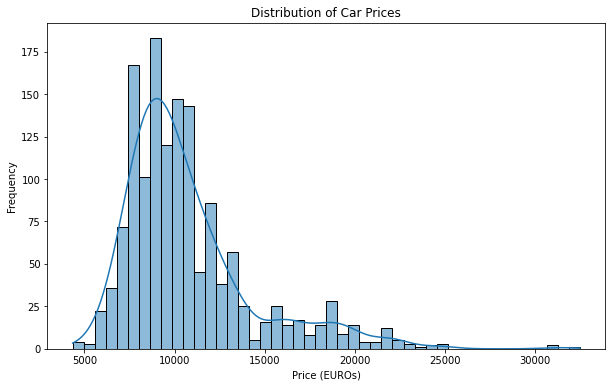

In [6]:
# Visualize the distribution of the target variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (EUROs)')
plt.ylabel('Frequency')
plt.show()

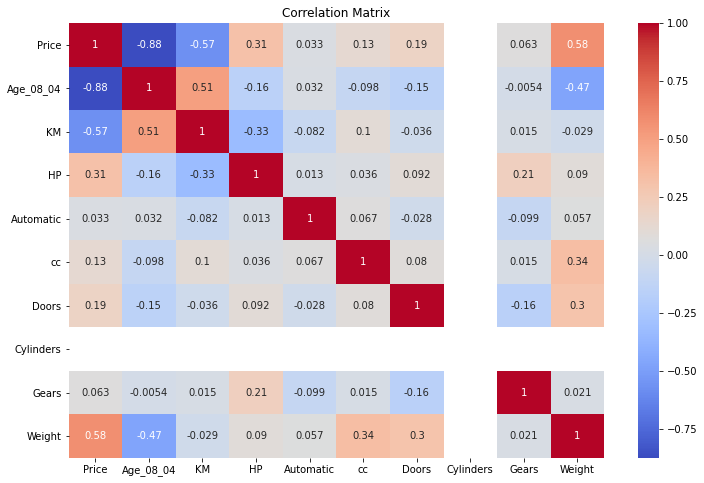

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Step 2: Data Preprocessing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
# Convert categorical variable 'FuelType' to dummy variables
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)

In [10]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


In [11]:
# Separate features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

In [12]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize the features (important for models like Lasso and Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled

array([[ 0.32969109, -0.25437232, -1.02708007, ..., -0.74551807,
        -0.35735329,  0.38321423],
       [ 0.64944782, -0.19405395,  0.59013961, ..., -0.74551807,
        -0.35735329,  0.38321423],
       [-0.84275022, -0.80214697,  0.59013961, ...,  0.13905584,
        -0.35735329,  0.38321423],
       ...,
       [ 1.28896126,  0.07587937,  0.59013961, ..., -0.05751614,
        -0.35735329,  0.38321423],
       [ 0.38298388, -0.11120576, -1.02708007, ..., -1.04037604,
        -0.35735329,  0.38321423],
       [ 1.28896126,  1.09118108,  0.59013961, ..., -0.74551807,
        -0.35735329,  0.38321423]])

In [15]:
X_test_scaled

array([[-0.30982235, -1.23079748, -0.28585438, ..., -0.94209005,
        -0.35735329,  0.38321423],
       [ 0.64944782,  0.30637886,  0.59013961, ..., -0.35237411,
        -0.35735329,  0.38321423],
       [ 0.16981273,  1.62191904, -1.97045821, ...,  1.22020173,
         2.79835116, -2.60950643],
       ...,
       [-0.84275022, -0.73086886,  0.59013961, ...,  0.13905584,
        -0.35735329,  0.38321423],
       [ 1.07579011, -1.82785114,  0.59013961, ...,  0.80740057,
        -0.35735329,  0.38321423],
       [ 0.16981273, -0.84723316,  0.59013961, ..., -0.4506601 ,
        -0.35735329,  0.38321423]])

### Step 3: Build Multiple Linear Regression Models

In [16]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [17]:
# Model 1: All features included
model_1 = LinearRegression()
model_1.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
# Drop the 'Doors' column from the original data
X_train_dropped = X_train.drop(columns=['Doors'])
X_test_dropped = X_test.drop(columns=['Doors'])


In [21]:
# Standardize the features (important for models like Lasso and Ridge)
scaler_2 = StandardScaler()
X_train_scaled_2 = scaler_2.fit_transform(X_train_dropped)
X_test_scaled_2 = scaler_2.transform(X_test_dropped)

In [22]:
model_2 = LinearRegression()
model_2.fit(X_train_scaled_2, y_train)

LinearRegression()

In [25]:
# Model 3: Using only highly correlated features
# Let's assume Age, KM, and Weight are highly correlated with Price
selected_features = ['Age_08_04', 'KM', 'Weight']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [26]:
scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)

In [27]:
model_3 = LinearRegression()
model_3.fit(X_train_selected_scaled, y_train)


LinearRegression()

In [28]:
# Display the coefficients of the models
print("Model 1 Coefficients:", model_1.coef_)
print("Model 2 Coefficients:", model_2.coef_)
print("Model 3 Coefficients:", model_3.coef_)

Model 1 Coefficients: [-2.26729478e+03 -6.11654412e+02  2.08349858e+02  3.43971298e+01
 -1.41619166e+01 -5.74678039e+01 -2.27373675e-13  1.09340417e+02
  1.31681831e+03 -2.17221726e+01  4.58047731e+02]
Model 2 Coefficients: [-2.26925663e+03 -6.18939748e+02  2.17855163e+02  4.12161138e+01
 -1.58585171e+01 -1.02318154e-12  1.20348627e+02  1.28022745e+03
 -1.32602697e+00  4.46876963e+02]
Model 3 Coefficients: [-2213.50035276  -927.63542198  1050.38286496]


In [29]:
# Interpret the coefficients
feature_names = X.columns
for i, coef in enumerate(model_1.coef_):
    print(f"Feature: {feature_names[i]}, Coefficient: {coef}")

Feature: Age_08_04, Coefficient: -2267.2947825060996
Feature: KM, Coefficient: -611.654411541434
Feature: HP, Coefficient: 208.3498578908248
Feature: Automatic, Coefficient: 34.39712978861685
Feature: cc, Coefficient: -14.16191663402089
Feature: Doors, Coefficient: -57.46780385451835
Feature: Cylinders, Coefficient: -2.2737367544323206e-13
Feature: Gears, Coefficient: 109.3404169504551
Feature: Weight, Coefficient: 1316.818310764173
Feature: Fuel_Type_Diesel, Coefficient: -21.722172573582128
Feature: Fuel_Type_Petrol, Coefficient: 458.04773146967756


### Step 4: Model Evaluation

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
# Model predictions
y_pred_1 = model_1.predict(X_test_scaled)
y_pred_2 = model_2.predict(X_test_scaled_2)
y_pred_3 = model_3.predict(X_test_selected_scaled)

In [35]:
# Evaluation metrics
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

In [36]:
print("Model 1 Evaluation:", evaluate_model(y_test, y_pred_1))
print("Model 2 Evaluation:", evaluate_model(y_test, y_pred_2))
print("Model 3 Evaluation:", evaluate_model(y_test, y_pred_3))


Model 1 Evaluation: (990.8872739193971, 2203043.8231437057, 0.834888804061108)
Model 2 Evaluation: (996.4345054725555, 2187147.670282138, 0.8360801706522889)
Model 3 Evaluation: (1020.5916300198205, 2234953.06172593, 0.8324973071292439)


### Step 5: Apply Lasso and Ridge Regression

In [37]:
from sklearn.linear_model import Lasso, Ridge

In [38]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [39]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [40]:
# Evaluate Lasso and Ridge
print("Lasso Regression Evaluation:", evaluate_model(y_test, y_pred_lasso))
print("Ridge Regression Evaluation:", evaluate_model(y_test, y_pred_ridge))

Lasso Regression Evaluation: (990.9001968731633, 2202739.480842683, 0.8349116135580271)
Ridge Regression Evaluation: (990.884450359825, 2202832.1358484146, 0.8349046693571694)


### Interview Questions

Normalization & Standardization:

Normalization scales data to a [0,1] range.
Standardization scales data to have a mean of 0 and a standard deviation of 1.
Helpful in ensuring all features contribute equally to the model, especially important for algorithms sensitive to feature scales like Lasso and Ridge regression.

Techniques to Address Multicollinearity:

Remove highly correlated features: Eliminate one of the correlated features.
    
Regularization: Use techniques like Ridge and Lasso regression.
    
Principal Component Analysis (PCA): Transform features into a set of linearly uncorrelated components.